<a href="https://colab.research.google.com/github/qazalkz/ML_step_by_step/blob/main/student_score___reggresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
grads_data = pd.read_csv("/content/drive/MyDrive/machine learning/student_scores.csv")
grads_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
grads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
grads_data.shape

(25, 2)

In [ ]:
grads_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
x = grads_data.iloc[:,0]            #همه سطرها و فقط ستون شماره 0 که میران ساعت درس خوندن هست
print(x.sample(3))                         # یک سری بوجود میاد چون یک بعدی هست
print("------------------------------")
print("sahpe of x is : " ,x.shape)

18    6.1
2     3.2
13    3.3
Name: Hours, dtype: float64
------------------------------
sahpe of x is :  (25,)


توجه کنید که به صورت دیتا فریم ما یک بردار دو بعدی میسازیم. اگر به شیپ داده توجه کنید منوجه میشید که 25 در 1 یعنی دو بعدی هست
و مدلهای ما همه به صورت بردار داده قبول میکنند

In [ ]:
X = grads_data.iloc[:,:-1]
print(X.sample(3))                         # یک دیتا فریم بوجود میاد
print("------------------------------")
print("sahpe of X is : " ,X.shape)

    Hours
19    7.4
17    1.9
21    4.8
------------------------------
sahpe of X is :  (25, 1)


In [ ]:
y = grads_data.iloc[:,-1]
print(y.head(3))                      
print("------------------------------")
print("sahpe of y is : " ,y.shape)

0    21
1    47
2    27
Name: Scores, dtype: int64
------------------------------
sahpe of y is :  (25,)


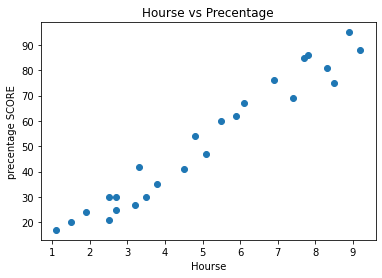

In [ ]:
plt.scatter(X, y)
plt.title("Hourse vs Precentage")
plt.xlabel('Hourse')
plt.ylabel("precentage SCORE")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

نرمال سازی داده ها که باعث تغییر در شیب خط میشه

In [ ]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_tast = sc.transform(X_test)

#Regression Model:

*   y = ax + b







In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("a: ", regressor.coef_)
print("b: ", regressor.intercept_)
print("y = {:.2f}x + {:.2f}".format(regressor.coef_[0], regressor.intercept_))


a:  [9.71409219]
b:  2.4803670915057623
y = 9.71x + 2.48


In [ ]:
y_pred = regressor.predict(X_test)              # y^
df_grad = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})   # y compare to y^
print(df_grad)

    Actual  Predicted
8       81  83.107332
16      30  26.765598
0       21  26.765598
23      76  69.507603
11      62  59.793511
9       25  28.708416
13      42  34.536871


In [ ]:

print("MAE : ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE : ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE :  4.425394675156182
MSE :  23.51639603459522
RMSE :  4.849370684387328
